In [593]:
import pandas as pd
import numpy as np

In [594]:
pd.__version__

'1.5.1'

# The Python datetime Module

In [595]:
# agenda:
# - the "what" and "why" of datetime module
# - date class
# - time class
# - the datetime class

In [596]:
# datetime
# NameError: name 'datetime' is not defined

In [597]:
from datetime import date, time, datetime

In [598]:
# year - month - day

In [599]:
date_A = date(2020, 4 , 25)

In [600]:
type(date_A)

datetime.date

In [601]:
date_A

datetime.date(2020, 4, 25)

In [602]:
A = '2020 , 4 , 5'

In [603]:
A

'2020 , 4 , 5'

In [604]:
date_A.year

2020

In [605]:
date_A.day

25

# the time class
## hour - minute - second - microsecond

In [606]:
time_A = time(4, 30, 12, 943212)

In [607]:
time_A

datetime.time(4, 30, 12, 943212)

In [608]:
time_B = time(6)

In [609]:
time_B

datetime.time(6, 0)

In [610]:
time_A.second

12

In [611]:
time_B.microsecond

0

In [612]:

time_A.isoformat()

'04:30:12.943212'

In [613]:
time_A

datetime.time(4, 30, 12, 943212)

# the datetime class

In [614]:
dt_A = datetime(2022, 11, 17, 17,37,45)

In [615]:
dt_A

datetime.datetime(2022, 11, 17, 17, 37, 45)

In [616]:
type(dt_A)

datetime.datetime

In [617]:
datetime.now()

datetime.datetime(2022, 11, 21, 6, 30, 4, 375617)

In [618]:
dt_A - datetime.now()

datetime.timedelta(days=-4, seconds=40060, microseconds=590837)

In [619]:
datetime.now() - dt_A

datetime.timedelta(days=3, seconds=46339, microseconds=441779)

In [620]:
print(dt_A)

2022-11-17 17:37:45


In [621]:
dt_B = datetime.now()

In [622]:
print(dt_B)

2022-11-21 06:30:04.503032


In [623]:
dt_B - dt_A

datetime.timedelta(days=3, seconds=46339, microseconds=503032)

In [624]:
print(dt_B - dt_A)

3 days, 12:52:19.503032


# Parsing Dates from text
### Whta if we don't have date objects?

In [625]:
# datetime -> strptime (sting pares time)

In [626]:
dt_C = datetime.strptime('2019-10-31','%Y-%m-%d')

In [627]:
dt_C.isoformat()

'2019-10-31T00:00:00'

In [628]:
dt_C.year

2019

In [629]:
# another example
try_this = 'jan 20 2090 4pm'

In [630]:
datetime.strptime(try_this, '%b %d %Y %I%p')

datetime.datetime(2090, 1, 20, 16, 0)

# Even Better: dateutil

In [631]:
pip show python-dateutil

Name: python-dateutil
Version: 2.8.2
Summary: Extensions to the standard Python datetime module
Home-page: https://github.com/dateutil/dateutil
Author: Gustavo Niemeyer
Author-email: gustavo@niemeyer.net
License: Dual License
Location: /Users/tomaszbury/Library/Python/3.11/lib/python/site-packages
Requires: six
Required-by: jupyter_client, matplotlib, pandas
Note: you may need to restart the kernel to use updated packages.


In [632]:
from dateutil import parser

In [633]:
parser.parse(try_this)

datetime.datetime(2090, 1, 20, 16, 0)

In [634]:
parser.parse('jan 21st 1990')

datetime.datetime(1990, 1, 21, 0, 0)

In [635]:
parser.parse('22 april 2068 at 4pm and 17 minutes 20 seconds')

datetime.datetime(2068, 4, 22, 16, 17, 20)

In [636]:
try_this_wrong = ' jan 20 2090; 4pm'
datetime.strptime(try_this_wrong, ' %b %d %Y; %I%p')

datetime.datetime(2090, 1, 20, 16, 0)

In [637]:
parser.parse(try_this_wrong)

datetime.datetime(2090, 1, 20, 16, 0)

# From DateTime To String
Cnvert text to tates:
* datetime strptime()
* datetutil parse()
* the strftime()

In [638]:
dt = datetime.now()

In [639]:
dt

datetime.datetime(2022, 11, 21, 6, 30, 5, 964907)

In [640]:
dt.strftime('%Y')

'2022'

In [641]:
dt.year

2022

In [642]:
type(dt.year)

int

In [643]:
type(dt.strftime('%Y %m'))

str

In [644]:
dt.strftime('Year: %Y; Month: %m; Day: %d')

'Year: 2022; Month: 11; Day: 21'

In [645]:
dt.strftime('%c')

'Mon Nov 21 06:30:05 2022'

an alternative approach:

"My date is {:%c}"

In [646]:
"My date is {:%c}".format(dt)

'My date is Mon Nov 21 06:30:05 2022'

# Performant Datetimes With Numpy
Previously: puthon time, date, datetime from datetime module
### Agenda:
* the numpy datetime64
* tradeoff between precision and span
* vectorized operation on arrays of dates

In [647]:
np.datetime64('2022-03-04')

numpy.datetime64('2022-03-04')

In [648]:
A = np.datetime64('2022-03-04')
B = np.datetime64(datetime.now())

In [649]:
A

numpy.datetime64('2022-03-04')

In [650]:
A + 10

numpy.datetime64('2022-03-14')

In [651]:
B

numpy.datetime64('2022-11-21T06:30:06.338911')

In [652]:
B + 10

numpy.datetime64('2022-11-21T06:30:06.338921')

In [653]:
np.datetime64(B, 'D')

numpy.datetime64('2022-11-21')

In [654]:
B

numpy.datetime64('2022-11-21T06:30:06.338911')

In [655]:
np.datetime64(B, 'D') + 10

numpy.datetime64('2022-12-01')

Vectorized ops

In [656]:
np.array([
    '2022-02-20',
    '2019-06-20',
    '2090-03-23'
], dtype=np.datetime64)

array(['2022-02-20', '2019-06-20', '2090-03-23'], dtype='datetime64[D]')

In [657]:
dates = np.array([
    '2022-02-20',
    '2019-06-20',
    '2090-03-23'
], dtype=np.datetime64)

In [658]:
dates - 10

array(['2022-02-10', '2019-06-10', '2090-03-13'], dtype='datetime64[D]')

.... what about businesdayss days

In [659]:
np.busday_offset(dates, offsets=-10, roll='backward')

array(['2022-02-04', '2019-06-06', '2090-03-09'], dtype='datetime64[D]')

# The Pandas Timestamp
Pandas timestamp = python datetime + numpy datetime64

In [660]:
'4th of July 1776'

'4th of July 1776'

In [661]:
pd.Timestamp('4th of July 1776')

Timestamp('1776-07-04 00:00:00')

In [662]:
pd.Timestamp('4/7/1776')

Timestamp('1776-04-07 00:00:00')

In [663]:
pd.to_datetime('4/7/1776',dayfirst=True)

Timestamp('1776-07-04 00:00:00')

In [664]:
pd_ts = pd.to_datetime('4/7/1776',dayfirst=True)

In [665]:
pd_ts.day_name()

'Thursday'

In [666]:
pd_ts.days_in_month

31

In [667]:
pd_ts.quarter

3

In [668]:
pd_ts.isocalendar()

datetime.IsoCalendarDate(year=1776, week=27, weekday=4)

# Our Dataset: Bret Prices
https://andybek.com/pandas-oil

In [669]:
oil_url = 'https://andybek.com/pandas-oil'

In [670]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

brent = pd.read_csv(oil_url)

In [671]:
brent.head(n=11)

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77
5,11-Jan-00,23.93
6,12-Jan-00,24.62
7,13-Jan-00,24.90
8,14-Jan-00,25.50
9,17-Jan-00,25.99


In [672]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5016 non-null   object 
 1   Price   5016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.5+ KB


# Date parsing and DatetimeIndex

In [673]:
brent.head()

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77


In [674]:
brent.dtypes

Date      object
Price    float64
dtype: object

In [675]:
brent.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5016 non-null   object 
 1   Price   5016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 362.6 KB


In [676]:
brent.Date = brent.Date.astype(np.datetime64)

In [677]:
brent.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [678]:
brent.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5016 non-null   datetime64[ns]
 1   Price   5016 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.5 KB


ns -> nanosecond -> 1/billionth of a second -> 10^ -9

In [679]:
brent.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5016 non-null   datetime64[ns]
 1   Price   5016 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.5 KB


In [680]:
brent.Date

0      2000-01-04
1      2000-01-05
2      2000-01-06
3      2000-01-07
4      2000-01-10
          ...    
5011   2019-09-24
5012   2019-09-25
5013   2019-09-26
5014   2019-09-27
5015   2019-09-30
Name: Date, Length: 5016, dtype: datetime64[ns]

In [681]:
brent.set_index('Date', inplace=True)

In [682]:
brent.head(n=3)

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55


In [683]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [684]:
pd.to_datetime(['3 jun 2020','jun 20 2030'])

DatetimeIndex(['2020-06-03', '2030-06-20'], dtype='datetime64[ns]', freq=None)

# 239. A Cool Shorcut: read_csv() with parse_dates
Previously:
* import data
* parse date columns
* re-assign

In [685]:
pd.read_csv(oil_url, index_col=0, parse_dates=True)

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


In [686]:
brent2 = pd.read_csv(oil_url, index_col=0, parse_dates=True)

In [687]:
brent2.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


If poor data quality this may not by the best option

# 240. Indexing Dates

In [688]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [689]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


Q: select the brent price on Jan 3rd 2017

In [690]:
brent.loc['2017-01-03']

Price    55.05
Name: 2017-01-03 00:00:00, dtype: float64

Q: select prices from jhan 3rd to jan 6th

In [691]:
brent.loc['2017-01-03':'2017-01-06']

,Price
Date,
2017-01-03,55.05
2017-01-04,54.57
2017-01-05,54.99
2017-01-06,55.90


Q: select all prices from jan 2019

In [692]:
brent.loc['2019-01-01':'2019-01-31']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


Partial string indexing

In [693]:
brent.loc['2019-01']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


Q: prices from the first two months of 2019

In [694]:
brent.loc['2019-01':'2019-02']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


Q: Select prices from July 2019 to mid Aug 2019

In [695]:
brent.loc['2019-07':'2019-08-17']

,Price
Date,
2019-07-01,65.10
2019-07-02,62.72
2019-07-03,63.53
2019-07-04,63.62
2019-07-05,64.23
2019-07-08,64.89
2019-07-09,64.30
2019-07-10,66.41
2019-07-11,67.64


# 241. Skill challenge

1. Using the brent series, create a shorter dataframe that only contains the dates from 1 December 2015 to 31 March 2016

In [696]:
brent.loc['2015-12-01':'2016-03-31']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


2. Repeat the above, but this using partial string indexing instead of specifying full dates. What was the standard deviation of prices during this period?

In [697]:
brent.loc['2015-12':'2016-03'].std()

Price    3.990123
dtype: float64

3. Was the mean price from February 2018 greater or les than the median price from March 2017?

In [698]:
brent.loc['2018-02'].mean()

Price    65.3175
dtype: float64

In [699]:
brent.loc['2017-03'].median()

Price    50.65
dtype: float64

In [700]:
feb_2018 = brent.loc['2018-02'].mean()[0]
march_2017 = brent.loc['2017-03'].median()[0]
feb_2018 > march_2017

True

242. Solution

1.

In [701]:
brent.loc['12/1/2015':'3/31/2016']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


2.

In [702]:
brent.loc['12/2015':'3/2016']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


In [703]:
brent.loc['dec 2015':'march 2016'].std()

Price    3.990123
dtype: float64

3.

In [704]:
brent.loc['feb 2018'].mean() > brent.loc['july 2017'].median()

Price    True
dtype: bool

243. DateTimeindex Attribute Accessors

In [705]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [706]:
brent.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=5016)

In [707]:
brent.index.week

/var/folders/kz/w63f9yjx2rs32jgdg8wkn4w40000gn/T/ipykernel_2922/1436609126.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  brent.index.week


Int64Index([ 1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
            ...
            38, 38, 38, 38, 39, 39, 39, 39, 39, 40],
           dtype='int64', name='Date', length=5016)

In [708]:
brent.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='Date', length=5016)

In [709]:
brent.index.isocalendar().week

Date
2000-01-04     1
2000-01-05     1
2000-01-06     1
2000-01-07     1
2000-01-10     2
              ..
2019-09-24    39
2019-09-25    39
2019-09-26    39
2019-09-27    39
2019-09-30    40
Name: week, Length: 5016, dtype: UInt32

In [710]:
brent.index.day

Int64Index([ 4,  5,  6,  7, 10, 11, 12, 13, 14, 17,
            ...
            17, 18, 19, 20, 23, 24, 25, 26, 27, 30],
           dtype='int64', name='Date', length=5016)

In [711]:
brent.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=5016)

In [712]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


Q: what day has registered the lowest Brent price, on average, in the past 19 years.

In [713]:
brent['Dayname'] = brent.index.day_name()

In [714]:
brent.head()

,Price,Dayname
Date,,
2000-01-04,23.95,Tuesday
2000-01-05,23.72,Wednesday
2000-01-06,23.55,Thursday
2000-01-07,23.35,Friday
2000-01-10,22.77,Monday


In [715]:
brent.groupby('Dayname').mean().idxmin()

Price    Monday
dtype: object

In [716]:
brent.drop(columns='Dayname', inplace=True)

In [717]:
brent.head(n=1)

,Price
Date,
2000-01-04,23.95


bool masks with datetimeindex atributes

### Q: Find the average Brent price in all leap year Februaries
## Aside:
* regular year: 365 days
* astronomical year: 365.25
* every 4 years: .25 * 4 = 1 day and that day is added to the regular year (365, a leap year)

In [718]:
brent[(brent.index.is_leap_year == True) & (brent.index.month == 2)].mean()

Price    60.696634
dtype: float64

# 244. Creating Date Ranges

In [719]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

date_range

In [720]:
pd.date_range(start='10 may 2020', end='20 june 2020')

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', freq='D')

In [721]:
pd.date_range('5/10/2020','20 june 2020')

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', freq='D')

In [722]:
pd.date_range(start='1/20/2020', periods=10)

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29'],
              dtype='datetime64[ns]', freq='D')

In [723]:
pd.date_range(start='1-1-2020',periods=11, freq='m')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', freq='M')

In [724]:
pd.date_range(start='1/20/2020', periods=10, freq='W')

DatetimeIndex(['2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16',
               '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15',
               '2020-03-22', '2020-03-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [725]:
pd.date_range(start='1-1-2020', periods=11, freq='2w')

DatetimeIndex(['2020-01-05', '2020-01-19', '2020-02-02', '2020-02-16',
               '2020-03-01', '2020-03-15', '2020-03-29', '2020-04-12',
               '2020-04-26', '2020-05-10', '2020-05-24'],
              dtype='datetime64[ns]', freq='2W-SUN')

The 20 month ends before jan 2021

In [726]:
dti = pd.date_range(end='jan 2021', periods=20, freq='m')

In [727]:
pd.DataFrame(index=dti, data=np.random.randint(100, size=(20, 4)), columns=list('abcd'))

,a,b,c,d
2019-05-31,71,37,91,31
2019-06-30,84,71,94,15
2019-07-31,21,28,64,69
2019-08-31,0,18,21,91
2019-09-30,70,24,75,80
2019-10-31,16,33,94,5
2019-11-30,55,72,95,46
2019-12-31,35,54,24,60
2020-01-31,80,3,44,93
2020-02-29,15,82,53,57


In [728]:
pd.DataFrame(index=dti, data=np.random.randint(100, size=(20, 4)), columns=list('abcd')).index

DatetimeIndex(['2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

# 245. Shifting Dates with pd.DateOffset
How to shift our dattimes?

In [729]:
# racing pigeon
dob = pd.Timestamp('2020-03-09')

When was the egg laid?

In [730]:
pd.DateOffset(days=18)

<DateOffset: days=18>

In [731]:
dob - pd.DateOffset(days=18)

Timestamp('2020-02-20 00:00:00')

Dateoffset suppoets many tempral params

In [732]:
pd.DateOffset(days=4, minutes=10, nanosecond=9)

<DateOffset: days=4, minutes=10, nanosecond=9>

In [733]:
pd.DateOffset(year=100)

<DateOffset: year=100>

In [734]:
brent.head(n=3)

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55


In [735]:
brent.set_index(brent.index + pd.DateOffset(hour=18))

/var/folders/kz/w63f9yjx2rs32jgdg8wkn4w40000gn/T/ipykernel_2922/843337698.py:1: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  brent.set_index(brent.index + pd.DateOffset(hour=18))


,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77
...,...
2019-09-24 18:00:00,64.13
2019-09-25 18:00:00,62.41
2019-09-26 18:00:00,62.08


In [736]:
brent.set_index(brent.index + np.timedelta64(18, 'h'))

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77
...,...
2019-09-24 18:00:00,64.13
2019-09-25 18:00:00,62.41
2019-09-26 18:00:00,62.08


In [737]:
%%time
brent.set_index(brent.index + pd.DateOffset(hour=18))

CPU times: user 64.9 ms, sys: 2.05 ms, total: 67 ms
Wall time: 71.9 ms


<timed eval>:1: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.


,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77
...,...
2019-09-24 18:00:00,64.13
2019-09-25 18:00:00,62.41
2019-09-26 18:00:00,62.08


In [738]:
%%time
brent.set_index(brent.index + np.timedelta64(18, 'h'))

CPU times: user 946 µs, sys: 618 µs, total: 1.56 ms
Wall time: 1.5 ms


,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77
...,...
2019-09-24 18:00:00,64.13
2019-09-25 18:00:00,62.41
2019-09-26 18:00:00,62.08


In [739]:
brent.set_index(brent.index + np.timedelta64(18, 'h')).index

DatetimeIndex(['2000-01-04 18:00:00', '2000-01-05 18:00:00',
               '2000-01-06 18:00:00', '2000-01-07 18:00:00',
               '2000-01-10 18:00:00', '2000-01-11 18:00:00',
               '2000-01-12 18:00:00', '2000-01-13 18:00:00',
               '2000-01-14 18:00:00', '2000-01-17 18:00:00',
               ...
               '2019-09-17 18:00:00', '2019-09-18 18:00:00',
               '2019-09-19 18:00:00', '2019-09-20 18:00:00',
               '2019-09-23 18:00:00', '2019-09-24 18:00:00',
               '2019-09-25 18:00:00', '2019-09-26 18:00:00',
               '2019-09-27 18:00:00', '2019-09-30 18:00:00'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [740]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [741]:
brent.set_index(brent.index + np.timedelta64(18, 'h'))

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77
...,...
2019-09-24 18:00:00,64.13
2019-09-25 18:00:00,62.41
2019-09-26 18:00:00,62.08


In [742]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

# 246. BONUS: Timedelts and absolute time
the TimeDelta class

In [743]:
pd.Timedelta(days=3, hours=4)

Timedelta('3 days 04:00:00')

In [744]:
pd.DateOffset(days=3, hours=4)

<DateOffset: days=3, hours=4>

In [745]:
brent.iloc[0].name

Timestamp('2000-01-04 00:00:00')

In [746]:
ts = brent.iloc[0].name
ts + pd.Timedelta(days=3, hours=4)

Timestamp('2000-01-07 04:00:00')

In [747]:
ts + pd.DateOffset(days=3, hours=4)

Timestamp('2000-01-07 04:00:00')

* dateoffset -> calendar-aware (day could be 23-25 hours)
* timedelta -> absolute time (day = 24 hours)

In [748]:
dts = pd.Timestamp('14 march 2021', tz='US/Eastern')

In [749]:
dts

Timestamp('2021-03-14 00:00:00-0500', tz='US/Eastern')

In [750]:
dts  + pd.DateOffset(days=1)

Timestamp('2021-03-15 00:00:00-0400', tz='US/Eastern')

In [751]:
dts + pd.Timedelta(days=1)

Timestamp('2021-03-15 01:00:00-0400', tz='US/Eastern')

In [752]:
dts + np.timedelta64(1, 'D')

Timestamp('2021-03-15 01:00:00-0400', tz='US/Eastern')

# 247. Resampling Timeseries
* resampling the frequency down -> downsampling

In [753]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


From D -> M

In [754]:
brent.resample('M')

many data points -> fewer and far between

In [755]:
brent.resample('M').median()

,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


In [756]:
import seaborn as sns 
sns.set()

<AxesSubplot: xlabel='Date'>

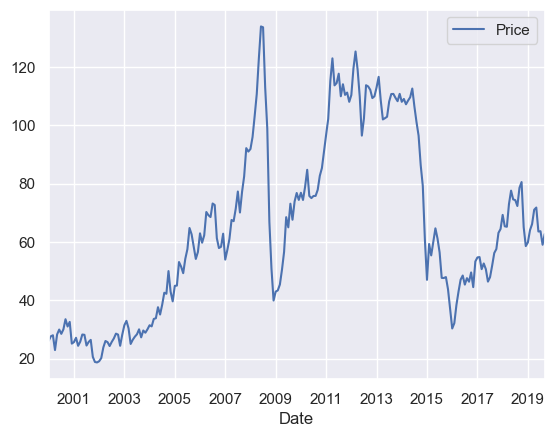

In [757]:
brent.resample('M').median().plot()

<AxesSubplot: xlabel='Date'>

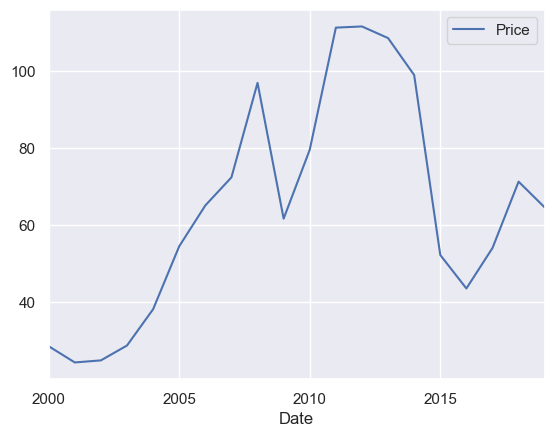

In [758]:
brent.resample('Y').mean().plot()

In [759]:
brent.resample('Y').mean().size

20

In [760]:
brent.size

5016

<AxesSubplot: xlabel='Date'>

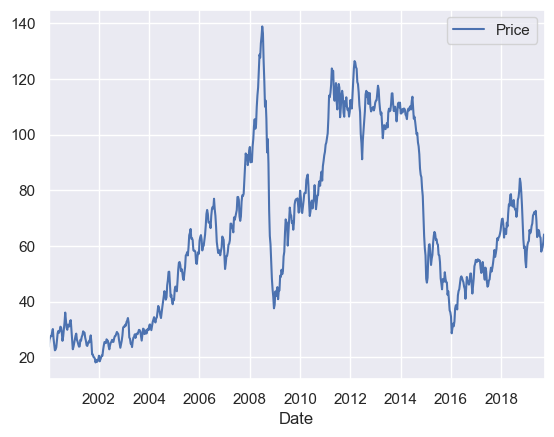

In [761]:
brent.resample('10D').mean().plot()

In [762]:
brent.resample('10D').mean().size

721

# 248. Upsampling and Interpolations
* resample frequency down -> downsample, eg. D(aily) -> M(onthly)
* resample frequency up -> upsample, eg. D(aily) -> H(ourly)

* downsample: many - fewer (aggregation)
* upsample: few -> many (interpolation)

In [763]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [764]:
brent.resample('8H').mean()

,Price
Date,
2000-01-04 00:00:00,23.95
2000-01-04 08:00:00,NaN
2000-01-04 16:00:00,NaN
2000-01-05 00:00:00,23.72
2000-01-05 08:00:00,NaN
...,...
2019-09-28 16:00:00,NaN
2019-09-29 00:00:00,NaN
2019-09-29 08:00:00,NaN


Linear intrpolation:

### ASIDE:
 
23.95 N1 N2 23.72

(27.72 - 23.95) / 3

In [765]:
diff = (27.72 - 23.95) / 3

### Key assumption in linear interpolation: distancesa are equal; the items are equally spaced

In [766]:
N1 = 23.95 + diff

In [767]:
N1

25.206666666666667

In [768]:
N2 = N1 + diff
N2

26.463333333333335

In [769]:
N2 + diff

27.720000000000002

In [770]:
round(N2 + diff,2)

27.72

### END ASIDE

In [771]:
brent.resample('8H').interpolate(method='linear')

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.873333
2000-01-04 16:00:00,23.796667
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.663333
...,...
2019-09-28 16:00:00,61.652222
2019-09-29 00:00:00,61.486667
2019-09-29 08:00:00,61.321111


In [772]:
brent.resample('8H').interpolate(method='spline', order=3)

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.013531
2000-01-04 16:00:00,23.117453
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.319619
...,...
2019-09-28 16:00:00,61.240570
2019-09-29 00:00:00,61.195778
2019-09-29 08:00:00,61.176797


In [773]:
brent.resample('2H').interpolate(method='akima')

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 02:00:00,23.928478
2000-01-04 04:00:00,23.907269
2000-01-04 06:00:00,23.886406
2000-01-04 08:00:00,23.865926
...,...
2019-09-29 16:00:00,61.289907
2019-09-29 18:00:00,61.217787
2019-09-29 20:00:00,61.143750


# 249. What about asfreq()?
* downsample: many -> few (aggregation)
* upsample few -> many (interpolation)

In [774]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [775]:
brent.asfreq('10D')

,Price
Date,
2000-01-04,23.95
2000-01-14,25.50
2000-01-24,27.02
2000-02-03,27.60
2000-02-13,NaN
...,...
2019-08-12,57.13
2019-08-22,59.81
2019-09-01,NaN


In [777]:
'2000-02-13' in brent.index

False

In [781]:
pd.Timestamp('2000-02-13').day_name()

'Sunday'

In [782]:
brent.asfreq('10D',method='ffill')

,Price
Date,
2000-01-04,23.95
2000-01-14,25.50
2000-01-24,27.02
2000-02-03,27.60
2000-02-13,27.82
...,...
2019-08-12,57.13
2019-08-22,59.81
2019-09-01,61.04


In [783]:
brent.asfreq('10D', fill_value=brent.values.mean())

,Price
Date,
2000-01-04,23.950000
2000-01-14,25.500000
2000-01-24,27.020000
2000-02-03,27.600000
2000-02-13,64.358078
...,...
2019-08-12,57.130000
2019-08-22,59.810000
2019-09-01,64.358078


In [786]:
brent.asfreq('M', method='ffill')

,Price
Date,
2000-01-31,27.08
2000-02-29,29.01
2000-03-31,23.98
2000-04-30,23.79
2000-05-31,29.64
...,...
2019-05-31,66.78
2019-06-30,67.52
2019-07-31,64.07


How it shis different from resample

In [787]:
brent.resample('M')

In [788]:
brent.resample('M').median()

,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


In [789]:
brent.asfreq('M', method='ffill').median()

Price    61.35
dtype: float64

* asfreq() -> it merely selects from the time series
* resample -> like groupby with date-time capabilities

# 250. BONUS: Bolling Windows

In [790]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


* window size: 3
* aggfunc: mean()

In [792]:
(brent.iloc[0] + brent.iloc[1] + brent.iloc[2]) / 3 # 1st in the window

Price    23.74
dtype: float64

In [793]:
(brent.iloc[1] + brent.iloc[2] + brent.iloc[3]) / 3 #2nd in the window

Price    23.54
dtype: float64

In [794]:
brent.rolling(3).mean()

,Price
Date,
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,23.740000
2000-01-07,23.540000
2000-01-10,23.223333
...,...
2019-09-24,64.673333
2019-09-25,63.733333
2019-09-26,62.873333


In [795]:
brent.rolling(10).mean().head(n=10)

,Price
Date,
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,NaN
2000-01-10,NaN
2000-01-11,NaN
2000-01-12,NaN
2000-01-13,NaN
2000-01-14,NaN


# Visualizing moving averages

Text(0, 0.5, 'Brent price(USD')

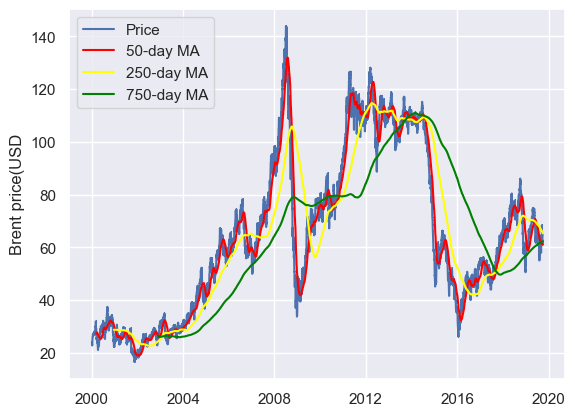

In [804]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(brent, marker=',', label='Price')
ax.plot(brent.rolling(50).mean(), color='red', label='50-day MA')
ax.plot(brent.rolling(250).mean(), color='yellow', label='250-day MA')
ax.plot(brent.rolling(750).mean(), color='green', label='750-day MA')

ax.legend()
ax.set_ylabel('Brent price(USD')

# 251. Skill Chalange

1. add a new column (called quarter) to the brent dataframe that contains each ate's respective calendar quarter, eg. 2000-01-04 would be quarter1.

In [806]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [807]:
brent['Quarter'] = brent.index.quarter

In [810]:
brent.sample(n=11)

,Price,Quarter
Date,,
2009-09-16,68.51,3
2007-05-18,69.26,2
2010-03-25,78.64,1
2009-06-08,67.61,2
2001-03-22,23.45,1
2009-01-29,43.13,1
2007-01-29,54.71,1
2002-04-08,26.36,2
2008-07-03,143.95,3


2. Using the new quarter column and the groupby() method, calculate the average price and standard deviation foer each quarter of the year 2014

In [814]:
brent.loc['2014'].groupby(by='Quarter').agg({'mean','std'})

Price            
               std        mean
Quarter                       
1         1.280641  108.141935
2         2.406442  109.694063
3         4.364868  101.899844
4        11.410171   76.429219

In [815]:
brent.loc['2014'].groupby('Quarter').agg(average_price=('Price','mean'),std_price=('Price', 'std'))

,average_price,std_price
Quarter,,
1,108.141935,1.280641
2,109.694063,2.406442
3,101.899844,4.364868
4,76.429219,11.410171


3. Reproduce the price average and standard deviation output from part 2 above, but this time using resample aand without relying on quarter column.

In [817]:
brent.loc['2014','Price'].resample('Q').agg({'mean','std'})

,std,mean
Date,,
2014-03-31,1.280641,108.141935
2014-06-30,2.406442,109.694063
2014-09-30,4.364868,101.899844
2014-12-31,11.410171,76.429219
